In [2]:
import numpy as np #fungsi untuk aljabar linear dan mtk lainnya
import pandas as pd #fungsi untuk file csv
import seaborn as sns #membaut visualisasi grafik
from scipy import stats #fungsi untuk statistika dasar dan komputasi numerik
import seaborn #visualisasi data paling dasar
import matplotlib.pyplot as plt #untuk plot atau titik titik data
from sklearn.model_selection import train_test_split #library machine learning training atau processing data
from sklearn.linear_model import LinearRegression  #import model untuk linear regression
import statsmodels.api as sm #kelas dan fungsi untuk estimasi model statistik
from statsmodels.stats.outliers_influence import variance_inflation_factor #mengecek seberapa banyak variasi data
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('50_Startups.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<h1>1. Hubungan Linier antara tiap feature dengan label (XdanY)</h1>

In [5]:
data.corr #analisis korelasi

<bound method DataFrame.corr of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

<Axes: >

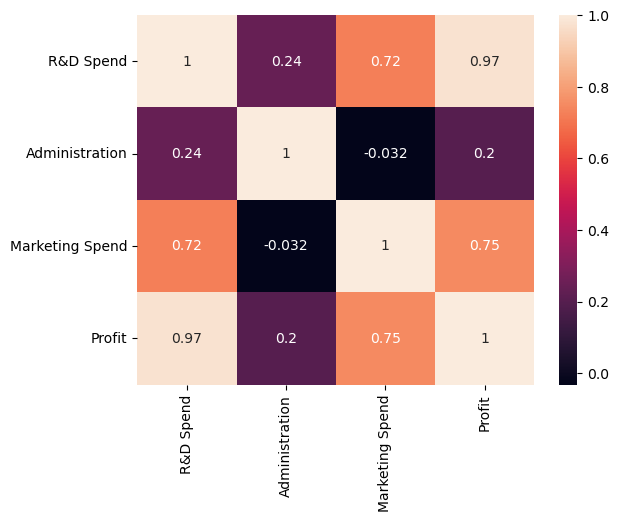

In [6]:
#visualisasi menggunakan heatmap
sns.heatmap(data.corr(),annot=True)


Text(0, 0.5, 'Prodif')

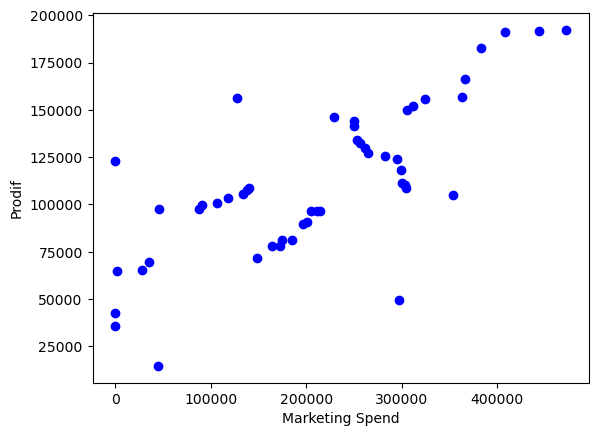

In [7]:
#visualisasi hubungan antara marketing spend dan profit
plt.scatter(data['Marketing Spend'],data['Profit'],color='blue')
plt.xlabel("Marketing Spend")
plt.ylabel("Prodif")

Text(0, 0.5, 'Prodif')

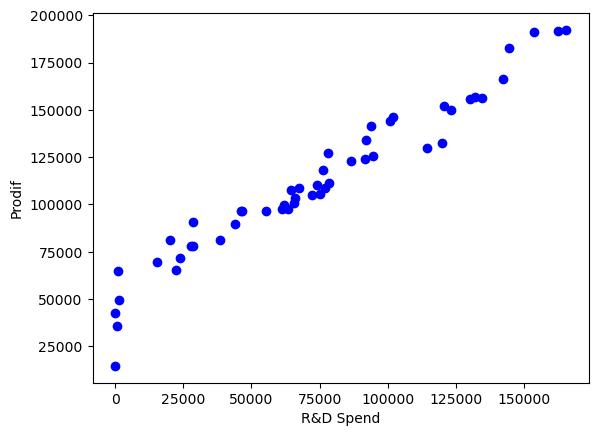

In [8]:
#visualisasi hubungan antara r&d spend dan profit
plt.scatter(data['R&D Spend'],data['Profit'],color='blue')
plt.xlabel("R&D Spend")
plt.ylabel("Prodif")

Text(0, 0.5, 'Prodif')

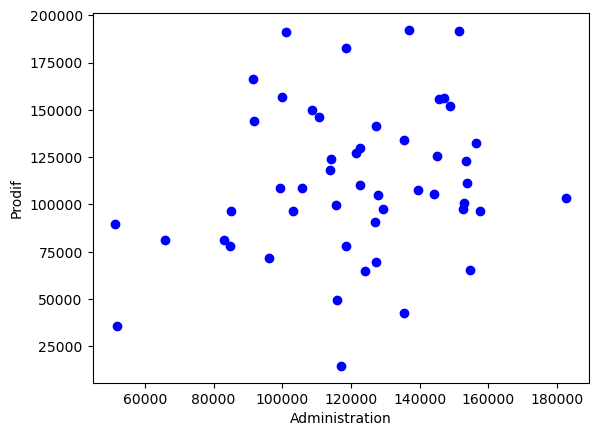

In [9]:
#visualisasi hubungan antara adminsitration dan profit
plt.scatter(data['Administration'],data['Profit'],color='blue')
plt.xlabel("Administration")
plt.ylabel("Prodif")

<h2>Splitting Data Menjadi Data Train dan Test</h2>

In [10]:
features = ['R&D Spend','Marketing Spend']
X = data[features].values
Y = data.Profit

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=23)

In [11]:
print('Data Train :', end='')
print(X_train.shape, Y_train.shape)
print('\nData Test :', end='')
print(X_test.shape, Y_test.shape)

#40 baris dengan 2 kolom untuk x, 40 baris untuk y

Data Train :(40, 2) (40,)

Data Test :(10, 2) (10,)


<h2>Modeling</h2>

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

<h1>2. Uji Normalitas</h1>

menurut sifat distribusi normal, kalau errornya nroaml dan modelnya linier maka koefisien regresinya juga berdistribusi normal(terhindar dari bias outlier)

hasil uji kolmogorof smirnov 
 KstestResult(statistic=0.12495970531173761, pvalue=0.5196300084946971, statistic_location=0.7555493879871521, statistic_sign=1)


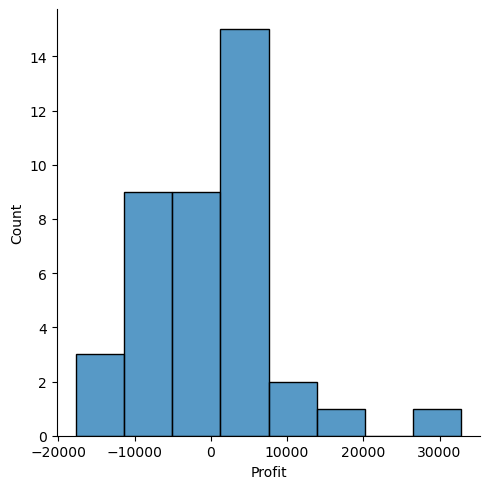

In [13]:
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.displot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm',)
print('hasil uji kolmogorof smirnov \n', norm_er)

Ho : data = berdistribusi normal

Ha : data tidak berdistribusi normal

Karena pvalue > 0.05, maka Ho diterima.

Plot histogram yang membentuk lonceng dan puncaknya cenderung ke tengah juga mendukung bahwa **errornya sudah berdistribusi normal**.

<h1>3. Tidak Terjadi Heteroskedastisitas</h1>
kondisi ketika nilai error pada tiap nilai prediksi beravariasi dan viariasinya cenderung konstan.
lawan dari hon=moskedastistas adalah heteroskedastisitas, dimaan error cenderunt berubah dan malah berkorelasi dengan prediksinya. jika ini terjadi tentu menunjukkan bahwa prediksi ini memiliki suatu bias tertentu.

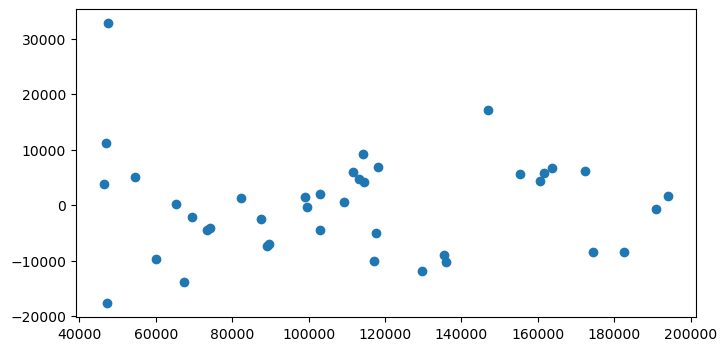

In [14]:
plt.figure(figsize=(8,4))
plt.scatter(y_predtrain,err)
plt.show()

terlihat plot errormua berada di sekitar angka yang sama meski nilai prediksinya bertambah. artinya nilai prediksi kita tidak terganggu oleh errornya atau tidak terjadi heteroskedastistas. 
apabila teracak seperti ini bagus, namun tidak bagus ketika ia membentusk sebuah garis dengan pola tertentu.

<h1>4. Tidak terjadi multikolinearitas (khusus regresi berganda)</h1>
maksudnya adalah hubungan yang kuat antar feature.
regresi linier mengasumsikan bahwa feature feature tidak saling berhubungan. tentu saja ini hanya berlaku untuk regresi linier berganda (yang featurenya lebih dari 1).
salah 1 caranya menguji adalah dengan melihat nilai vif

In [15]:
vif = [variance_inflation_factor(X_train,i) for i in range(len(X_train.T))]
pd.DataFrame({'VIF' : vif[0:]}, index=features).T

,R&D Spend,Marketing Spend
VIF,6.637335,6.637335


Some papers argue that a VIF<10 is acceptable, but others says that the limit value is 5.

"10" as the maximum level of VIF (Hair et al., 1995)
"5" as the maximum level of VIF (Ringle et al., 2015)

<h1>5. Tidak Terjadi Autokorelasi</h1>
Autokorelasi adalah hubungan yang erat antar entry, misalnya antara data ke 4 dengan ke 5, data ke-6 dengan ke-7, dll.
Autokorelasi juga harus dihindari dalam regresi linier. uji ini tersedia library yang lain, sehingga kita perlu training model lagi menggunakan libraray itu.

In [16]:
X_constant = sm.add_constant(X_train)
linreg  = sm.OLS(Y_train, X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.97e-26
Time:                        10:03:42   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2>Mengevaluasi hasil regresi linier</h2>
mengevaluasi model menggunakan metrics MSE, RMSE, dan MAE

In [17]:
y_predtest = lin_reg.predict(X_test)

#mse
mse_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSe data training =' , mse_train)
mse_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing =', mse_test)

#RMSE
rmse_train = np.sqrt(mse_train)
print('Nilai RMSE data training =', rmse_train)
rmse_test = np.sqrt(mse_test)
print('Nilai RMSE data testing =', rmse_test)

#MAE
mae_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training = ', mae_train)
mae_test = mean_absolute_error(Y_test,y_predtest)
print('Nilai MAE data testing = ', mae_test )

Nilai MSe data training = 81897487.02005288
Nilai MSE data testing = 71176114.65887153
Nilai RMSE data training = 9049.723035543844
Nilai RMSE data testing = 8436.593782971391
Nilai MAE data training =  6843.00776963972
Nilai MAE data testing =  5771.482003539184


<h2>Visualisasi Hasil Prediksi</h2>
kita akan memvisualisasikan hasil prediksi dengan data sebenarnya (data testing)

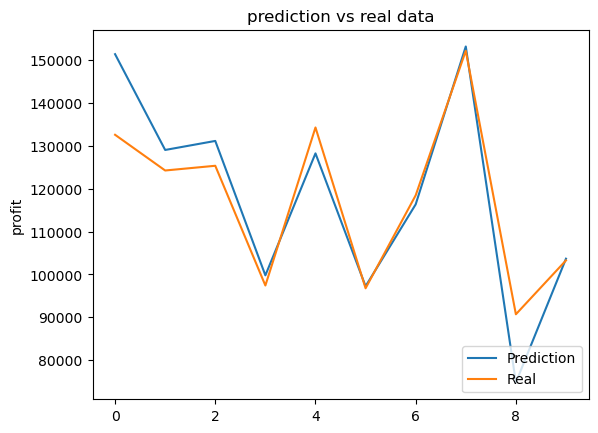

In [19]:
#plotting data prediksi dan testing untuk membandingakn
plt.plot(y_predtest)
plt.plot(Y_test.values)

#berikan judul untuk graph/figure
plt.title('prediction vs real data')

#add y label
plt.ylabel('profit')

#adding legend to the plot/graph/figure
plt.legend(labels=['Prediction','Real'], loc='lower right')

<h2>Koefisien Determinasi (R2)</h2>
Terlihat nilai R2 = 0,9499, ini merupakan nilai yang sangat bagus
nilai ini menunjukkan 94.99% dari profit dapat diprediksi oleh R&D spen dan marketing spend.
sisanya (5.01%) dipengaruhi faktor lain yang tidak ada di model ini.

<h2>Uji simultan, parsial, dan besar pengaruh feature</h2>

1. uji simultan
    terlihat nilai p-value uji-f (Prob(F-statistic)) adalah 5.97 x 10^26 < 0.05, artinya secara bersama-sama R&D Spend dan Marketing Spend berpengaruh signifikan terhadap Profit.
2. Uji parsial
    terlihat nilai p-value uji-t (p>|t|) untuk R&D adalah 0.000 > 0.05 dan Marketing 0.176, artinya secara sendiri-sendiri R&D Spend memberi pengaruh yang signifikan terhadap Profit, smentara pengaruh dari Marketing spend tidak signifikan.
3. Besar pengaruh feature
    Perhatikan kolom "coef", pada x1 (R&D Spend) nilainya 0.8251, artinya setiap perusahaan menaikkan kinerja R&D Spend 1 lebel saja mampu meningkatkan Profit perusahaan sebesar 0.8251. Sementara koefisien x2 (marketing) sebesar 0.0236. Artinya, selama ini pengaruh Marketing Spend terhadap Profit hanya 0.236

In [20]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.97e-26
Time:                        10:30:37   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Kesimpulan</h1>
karena model yang kita buat telah memenuhi uji asumsi klasik, maka model tersebut sudah bisa kita pakai untuk memprediksi data baru.
model ini juga sudah bisa kita deploy

In [21]:
#input data baru
rnd_rpend = float(input('Input nilai r&d spend'))
marketing_rpend = float(input('Input nilai marketing spend'))
data_baru = [[rnd_rpend, marketing_rpend]]

#prediksi data baru menggunakan model regresi linier
hasil_prediksi = lin_reg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

#cetak hasil prediksi profit
print('prediksi profit yang akan didapat adalah', hasil_prediksi)

prediksi profit yang akan didapat adalah 46397.23212203479
